# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.057918e+01     7.785114e+00
 * time: 0.004332065582275391
     1     2.934618e+01     6.004095e+00
 * time: 0.012692928314208984
     2     1.620616e+01     3.608469e+00
 * time: 0.03621101379394531
     3     1.253038e+01     1.866835e+00
 * time: 0.05591607093811035
     4     1.108671e+01     1.074279e+00
 * time: 0.0763709545135498
     5     1.029757e+01     8.229624e-01
 * time: 0.1868431568145752
     6     9.970954e+00     1.421380e+00
 * time: 0.20101094245910645
     7     9.548084e+00     8.698567e-01
 * time: 0.21658992767333984
     8     9.242274e+00     8.332322e-01
 * time: 0.23103809356689453
     9     9.008077e+00     8.316432e-01
 * time: 0.24512600898742676
    10     8.887931e+00     5.970558e-01
 * time: 0.2590219974517822
    11     8.774252e+00     4.296141e-01
 * time: 0.27311110496520996
    12     8.729738e+00     7.372760e-01
 * time: 0.2842590808868408
    13     8.681707e+00     3.835788e-01
 * time: 0

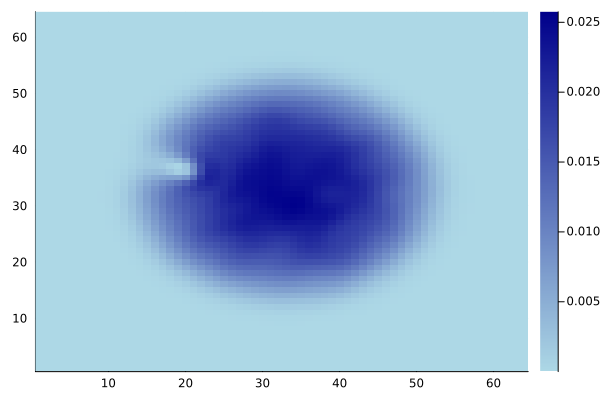

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)